In [1]:
from keras.utils import image_dataset_from_directory
import tensorflow as tf
train_dir_1 = 'trainning/train1'
train_dir_2 = 'trainning/train2'
train_dir_3 = 'trainning/train3'
validation_dir = 'train4' # Validation
train_dir_5 = 'trainning/train5'
test_dir = 'test'

trainning = [train_dir_1, train_dir_2,train_dir_3,train_dir_5]

train_dir = train_dir_2
IMG_SIZE = 32 # 32x32

# image_dataset_from_directory with labels="inferred" for 
# getting the images in the subdirectories and translating the subdirectory as a class 
# of type categorical
#train_dataset = image_dataset_from_directory(train_dir,image_size=(IMG_SIZE, IMG_SIZE),batch_size=32, labels="inferred", label_mode="categorical")
test_dataset = image_dataset_from_directory(test_dir,image_size=(IMG_SIZE, IMG_SIZE), labels="inferred",label_mode="categorical")
validation_dataset = image_dataset_from_directory(validation_dir,image_size=(IMG_SIZE, IMG_SIZE), labels="inferred",label_mode="categorical")

train_dataset = tf.data.Dataset

for i in trainning:
    if i == trainning[0]:
        train_dataset = image_dataset_from_directory(i, image_size=(IMG_SIZE, IMG_SIZE), labels="inferred", label_mode="categorical")
        continue
    train_dataset = train_dataset.concatenate( image_dataset_from_directory(i, image_size=(IMG_SIZE, IMG_SIZE), labels="inferred", label_mode="categorical"))




Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [2]:
#imports
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import keras
from keras import layers
import numpy as np
IMG_SIZE = 32

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same', kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same', kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same', kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)


x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Output layer
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(
    'models_S/S_without_DA_First.h5', monitor='val_loss', verbose=0,
    save_best_only=True, mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, verbose=1, mode='min',
    restore_best_weights=True
)

rl = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=4,
    verbose=0,
    mode="min",
)


# batch size 32
# Test loss: 0.6775595545768738
# Test accuracy: 0.8391000032424927

# batch size 64
# Test loss: 0.693570613861084
# Test accuracy: 0.8421000242233276

# batchsize 128
# Test loss: 0.7256516814231873
# Test accuracy: 0.8317000269889832

# sem BatchNormalization
#Test loss: 0.7569888234138489
# Test accuracy: 0.8009999990463257

# sem Droupout
#Test loss: 1.2996251583099365
#Test accuracy: 0.7465000152587891



#64 BATCH_SIZE - pacience 10

# Epoch 102: early stopping
# 313/313 [==============================] - 1s 3ms/step - loss: 0.7004 - accuracy: 0.8350
# Test loss: 0.7004380226135254
# Test accuracy: 0.8349999785423279

#128
# Test loss: 0.7256516814231873
# Test accuracy: 0.8317000269889832

In [4]:
history = model.fit(
    train_dataset,
    epochs=200,
    batch_size=128,
    validation_data=validation_dataset,
    callbacks=[checkpoint, early_stopping, rl]
  )


# Avaliar o modelo (com o teste)
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Epoch 1/200


1252/1252 [==============================] - 122s 98ms/step - loss: 2.4612 - accuracy: 0.3994 - val_loss: 3.0313 - val_accuracy: 0.3178 - lr: 0.0010
Epoch 2/200
1252/1252 [==============================] - 35s 28ms/step - loss: 1.8749 - accuracy: 0.5286 - val_loss: 1.7325 - val_accuracy: 0.5480 - lr: 0.0010
Epoch 3/200
1252/1252 [==============================] - 35s 28ms/step - loss: 1.6502 - accuracy: 0.5878 - val_loss: 1.7617 - val_accuracy: 0.5382 - lr: 0.0010
Epoch 4/200
1252/1252 [==============================] - 33s 26ms/step - loss: 1.5788 - accuracy: 0.6197 - val_loss: 1.6868 - val_accuracy: 0.5654 - lr: 0.0010
Epoch 5/200
1252/1252 [==============================] - 34s 27ms/step - loss: 1.5629 - accuracy: 0.6341 - val_loss: 1.4883 - val_accuracy: 0.6629 - lr: 0.0010
Epoch 6/200
1252/1252 [==============================] - 33s 26ms/step - loss: 1.5438 - accuracy: 0.6480 - val_loss: 1.4054 - val_accuracy: 0.6954 - lr: 0.0010
Epoch 7/200
1252/1252 [============================

O modelo contém 3 camadas convolucionais para reconhecer padrões presentes nas imagens, e para analisar os dados espaciais.
 Adicionamos uma camada convolucional (**layers.Conv2D**) com x filtros, cada um com tamanho (janela de convolução) 3x3, utilizando a função de ativação ReLU. O padding='same' garante que a saída tenha o mesmo tamanho da entrada (uma vez que stride é 1). O kernel_regularizer=keras.regularizers.l2(0.001) aplica a regularização L2 para evitar overfitting. A regularização L2 ajuda a reduzir a importância de variáveis correlacionadas, evitando que elas dominem o modelo e prejudiquem a generalização.

 Com o objetivo de normalizar a ativação da camada anterior, acelerar o treino, e melhorar a estabilidade do modelo adiciona-mos o layer **layers.BatchNormalization**. Este aplica uma transformação que mantém a saída média próxima de 0 e o desvio padrão da saída próximo de 1.

Usamos **layers.MaxPooling2D** para reduzir a dimensão espacial da entrada pela metade ao utilizar uma janela de 2x2.

Para evitar overfitting aplicamos uma camada de dropout (**layers.Dropout**) com uma taxa de 0.25, esta desativa aleatoriamente 25% dos neurónios da camada durante o treino.

Este processo é repetido 3 vezes mas com um numero de filtros maior em cada layer (a dobrar), estas camadas convolucionais cada vez extraem características mais especificas.
Depois de extrair as características através das camadas convolucionais, os dados são achatados (flatten) e passados para as camadas densas para classificação. Este modelo tem 2 camadas densas. Primeiro tranformamos a entrada 2D num vetor 1D usando **layers.Flatten**, uma vez que as camadas densas recebem um vetor de uma dimensão. Depois foi adicionada uma camada densa (totalmente conectada) com 256
neurónios e a função de ativação ReLU (**layers.Dense**). Esta inclui regularização L2. Normaliza-se a saída da camada densa (**layers.BatchNormalization**). E aplica-se dropout com uma taxa de 0.5 para evitar overfitting (**layers.Dropout**).

Depois na camada de saída temos uma uma camada densa (**layers.Dense**) com 10 neurónios, um para cada classe, utilizando a função de ativação softmax para obter as probabilidades de classificação.

Após o modelo estar construido definimos o modelo com as entradas e saídas especificadas (**keras.Model**). E compilamos o modelo (**model.compile**)utilizando a perda categorical_crossentropy, o otimizador adam, e a métrica de accuracy. Usamos o categorical_crossentropy uma vez que este é adequado para problemas multiclasse, ele mede a diferença entre a distribuição de probabilidade verdadeira das classes e a distribuição de probabilidade prevista, incentivando previsões de probabilidades que são mais próximas das distribuições reais das classes. Usamos o otimizador adam pois este proporciona uma taxa de aprendizagem adaptativa e é eficiente, funcionando bem com diferentes tipos de dados e problemas. A accuracy fornece uma métrica simples e intuitiva para avaliar o desempenho do modelo, é útil para verificar rapidamente se o modelo está a aprender corretamente.
Para acabar usamos callbacks, primeiro salvamos o melhor modelo com base na métrica val_loss (**ModelCheckpoint**).
Usamos o **EarlyStopping ** para parar o treino em caso que a val_loss não melhor em 5 épocas consecutivas e restaura os melhores pesos do modelo.
Durante o treino ajustamos a taxa de aprendizado (**LearningRateScheduler**). Esta mantém a taxa de aprendizado constante nas primeiras 10 épocas e a reduz exponencialmente depois disso.


Ao longo do processo de construção deste modelo, testámos várias camadas convolucionais com diferentes parâmetros e quantidades. Além disso, experimentámos diversas estratégias para combater o sobreajuste (overfitting). Este modelo final foi o que apresentou os melhores resultados.

Testou-se com diferentes valores de batch size e chegou-se à conclusão que não parece haver uma relação direta entre a accuracy e este valor, a nível de tempo com um batch size maior obviamente cada época demora mais tempo, mas depois vão ser precisas menos épocas para convergir. Consoante a seguinte tabela 128 para o batch size foi o que permitiu maior accuracy, mas uma vez que estou a usar o colab fica dificil fazer todos os testes que gostaria para tirar mais conclusões. Mas uma vez que por volta de uns 10 treinos a maior accuracy que tivemos foi com um batch size de 128, ficou esse.
E no modeloS extra usámos o batch size de 128, uma vez que este é mais rápido e obtivemos melhores resultados.

Como se pode ver sem BatchNormalization a accuracy é bem mais baixa:
Test loss: 0.75
Test accuracy: 0.80

E sem Droupout a accuracy nem chega aos 0.75 :
Test loss: 1.29
Test accuracy: 0.74

Tendo o modelo final :
Test loss: 0.693570613861084
Test accuracy: 0.8421000242233276


Após "finalizar" com uma boa accuracy o modelo S decidiu-se adaptar o modelo com data augmentation.

\


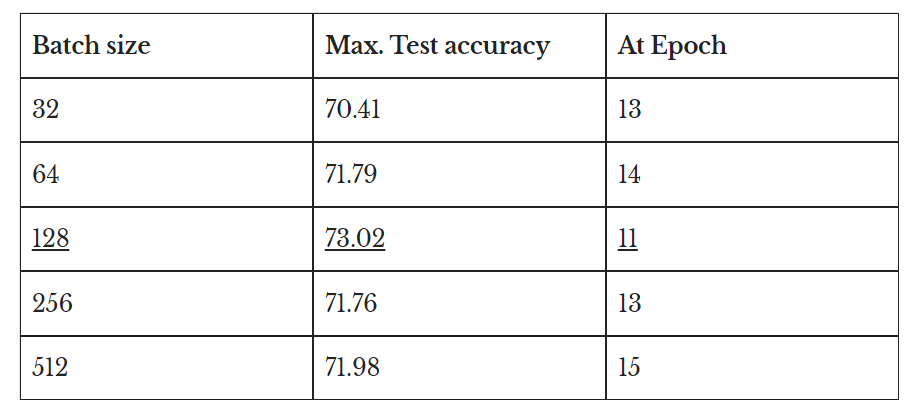


**layers.Conv2D**:https://www.ibm.com/topics/convolutional-neural-networks
**layers.BatchNormalization**:https://medium.com/@ilyurek/demystifying-batch-normalization-a-practical-guide-with-python-24c58956d3e

**layers.MaxPooling2D**:https://keras.io/api/layers/pooling_layers/max_pooling2d/

**layers.Dropout**:https://databasecamp.de/en/ml/dropout-layer-en

**L2 Regularization:** https://medium.com/@fernando.dijkinga/explaining-l1-and-l2-regularization-in-machine-learning-2356ee91c8e3

**MODELO S COM DATA AUGMENTATION**

Com o objetivo de aumentar a quantidade e a diversidade dos dados de treino, o que ajuda a melhorar a generalização e a robustez do modelo. Adicionámos data augmentation.


In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
import keras
from keras import layers

data_augmentation = keras.Sequential(
        [layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),])

    # rotation_range=20,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # fill_mode='nearest',
    # # shear_range=0.2,
    # # zoom_range=0.2,
    # # horizontal_flip=True,
    # # fill_mode='nearest',
    # # channel_shift_range=0.2,

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same', kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same', kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same', kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)

x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Output layer
outputs = layers.Dense(10, activation="softmax")(x)

model2 = keras.Model(inputs=inputs, outputs=outputs)

# compilar o modelo
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(
    'models_S/S_with_DA_First.h5', monitor='val_loss', verbose=0,
    save_best_only=True, mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss', patience=4, verbose=1, mode='min',
    restore_best_weights=True
)

learning_rate = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=4,
    verbose=0,
    mode="min",
)

In [ ]:
history2 = model.fit(
    train_dataset,
    epochs=200,
    batch_size=128,
    validation_data=validation_dataset,
    callbacks=[checkpoint, early_stopping, rl]
  )


# Avaliar o modelo (com o teste)
test_loss, test_accuracy = model2.evaluate(test_dataset)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Epoch 1/200
1248/1250 [============================>.] - ETA: 0s - loss: 1.7520 - accuracy: 0.5494
Epoch 1: val_loss improved from 1.59985 to 1.57618, saving model to best_model3.h5
1250/1250 [==============================] - 33s 26ms/step - loss: 1.7520 - accuracy: 0.5493 - val_loss: 1.5762 - val_accuracy: 0.6225 - lr: 0.0010
Epoch 2/200
1248/1250 [============================>.] - ETA: 0s - loss: 1.7445 - accuracy: 0.5595
Epoch 2: val_loss improved from 1.57618 to 1.47002, saving model to best_model3.h5
1250/1250 [==============================] - 33s 26ms/step - loss: 1.7445 - accuracy: 0.5594 - val_loss: 1.4700 - val_accuracy: 0.6492 - lr: 0.0010
Epoch 3/200
1249/1250 [============================>.] - ETA: 0s - loss: 1.7224 - accuracy: 0.5674
Epoch 3: val_loss did not improve from 1.47002
1250/1250 [==============================] - 33s 26ms/step - loss: 1.7222 - accuracy: 0.5675 - val_loss: 1.5922 - val_accuracy: 0.5942 - lr: 0.0010
Epoch 4/200
1249/1250 [=======================

Começa-mos com estas transformações, mas chegamos à conclusão que era demasiada agressiva uma vez que piorou em muito a precisão do modelo...
Algo que não estava à espera.


data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.3),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2),
])

outras:
dataAug = ImageDataGenerator(
    rotation_range=40,              
    width_shift_range=0.2,          
    height_shift_range=0.2,         
    shear_range=0.2,               
    zoom_range=0.2,                
    horizontal_flip=True,          
    fill_mode='nearest',           
    brightness_range=[0.8, 1.2],    
    channel_shift_range=0.2,        
)

Epoch 47/100
625/625 [==============================] - ETA: 0s - loss: 1.1264 - accuracy: 0.6619


Então decidimos diminuir a intensidade das alterações.

data_augmentation = keras.Sequential(
[layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),])


Test loss: 0.8087025117874146
Test accuracy: 0.7913000273704529

**ANALISE DE RESULTADOS** sobre S sem data augmentation

In [2]:
from keras.models import load_model
model = load_model('/content/best_modelS_WITHOUT_64.h5')


In [10]:
import pandas as pd
import numpy as np

# usar para instalar...: pip install scikit-learn
from sklearn import metrics
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import LabelEncoder

# to install IPython, use: pip install ipython
from IPython.display import display

from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Para avaliar o desempenho do modelo usamos a matriz de confusão, esta mostra o número de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos para cada classe.
E também apresentamos os valores para a
accuracy, esta indica o desempenho geral do modelo que consiste na proporção de previsões corretas em relação ao total de previsões feitas. Dentre todas as classificações, quantas o modelo classificou corretamente.
A precisão mede a exatidão das previsões positivas do modelo. A proporção de verdadeiros positivos (TP) em relação ao total de previsões positivas (TP + FP).
Recall/Revocação/Sensibilidade: A proporção de verdadeiros positivos em relação ao total de exemplos reais positivos (TP + FN). Mede a capacidade do modelo de encontrar todos os exemplos positivos. E o F1-Scor é a média harmônica entre precisão e recall. É uma métrica balanceada que considera tanto falsos positivos quanto falsos negativos.

1/1 [==============================] - 0s 232ms/step


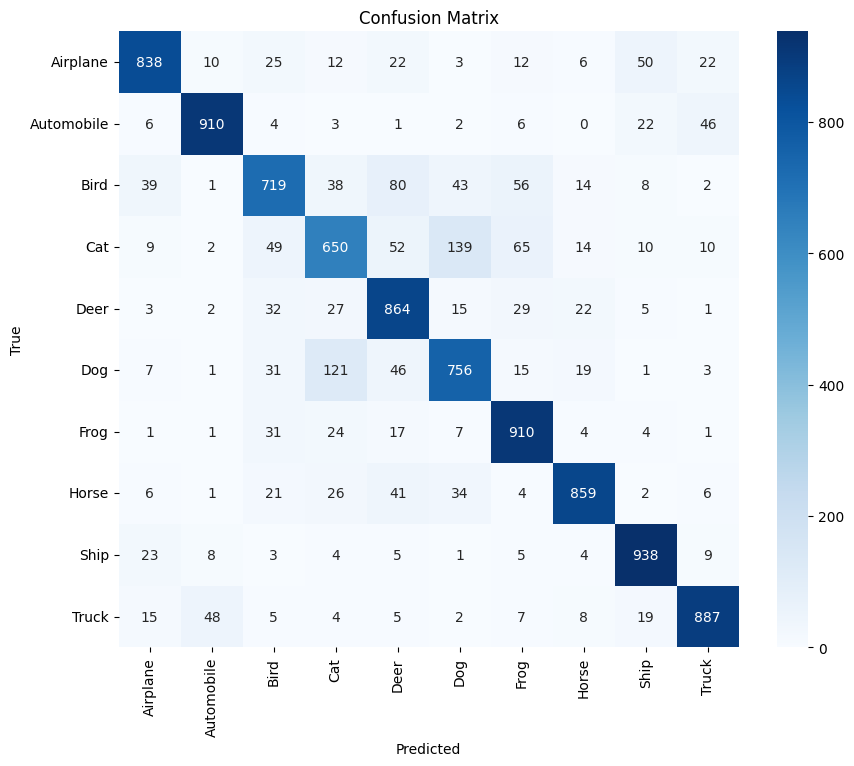

Classification Report:
               precision    recall  f1-score   support

    Airplane       0.88      0.84      0.86      1000
  Automobile       0.92      0.91      0.92      1000
        Bird       0.78      0.72      0.75      1000
         Cat       0.72      0.65      0.68      1000
        Deer       0.76      0.86      0.81      1000
         Dog       0.75      0.76      0.76      1000
        Frog       0.82      0.91      0.86      1000
       Horse       0.90      0.86      0.88      1000
        Ship       0.89      0.94      0.91      1000
       Truck       0.90      0.89      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# Definir nomes das classes
class_names = {
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck"
}

# Prever para todo o conjunto de teste
y_pred = []
y_true = []

for x, y in test_dataset:
    predictions = model.predict(x)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(np.argmax(y, axis=1))

y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Relatório de classificação
class_report = classification_report(y_true, y_pred, target_names=class_names.values())
print("Classification Report:\n", class_report)


Agora com o objetivo de mobnitorizar o processo de treino e verificar se o modelo está a aprender corretamente ao longo do tempo.
Usamos as curvas de perda de treino (loss) e de validação (val_loss) ao longo das épocas. E a curva de accuracy de treino (acc) e de validação (val_acc) ao longo das épocas.
Estas permitem por exemplo ao comparar as curvas de treino e validação, é possível identificar problemas de overfitting (onde a perda de validação aumenta enquanto a perda de treino diminui) ou underfitting (onde ambas as perdas são altas).
Com base nas curvas, ajustes podem ser feitos aos hiperparâmetros do modelo, como a taxa de aprendizagem, o número de épocas, e outros.

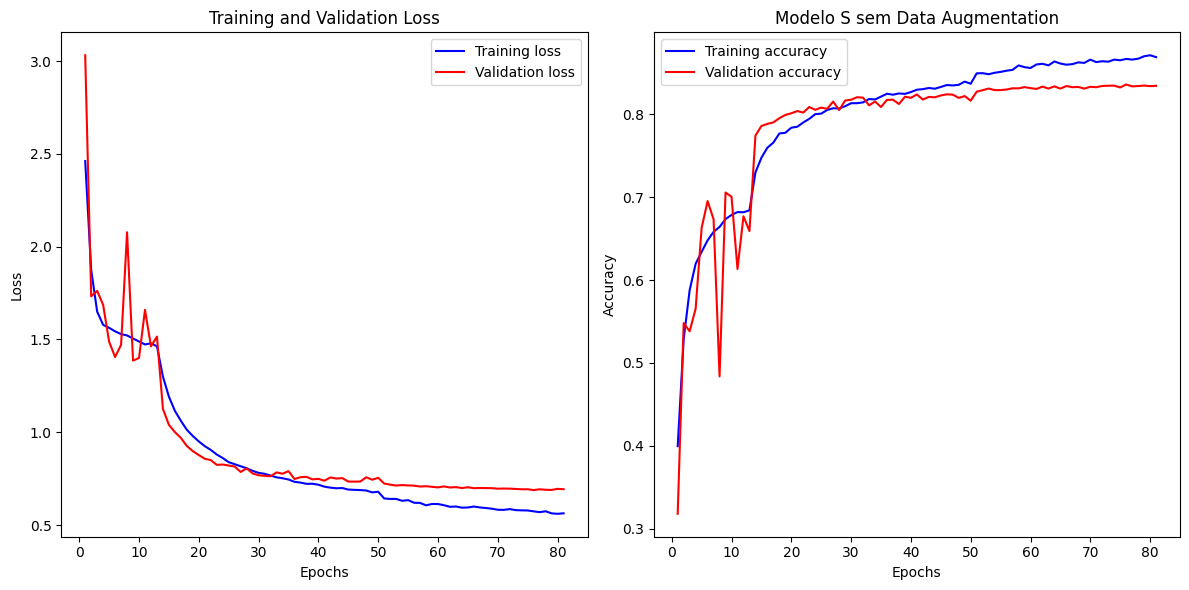

In [12]:
def graph(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

graph(history, "Modelo S sem Data Augmentation")


Para visualizar exemplos de imagens do conjunto de dados, juntamente com as previsões feitas pelo modelo. Com o objetivo de permitir uma análise visual rápida e intuitiva do desempenho do modelo.

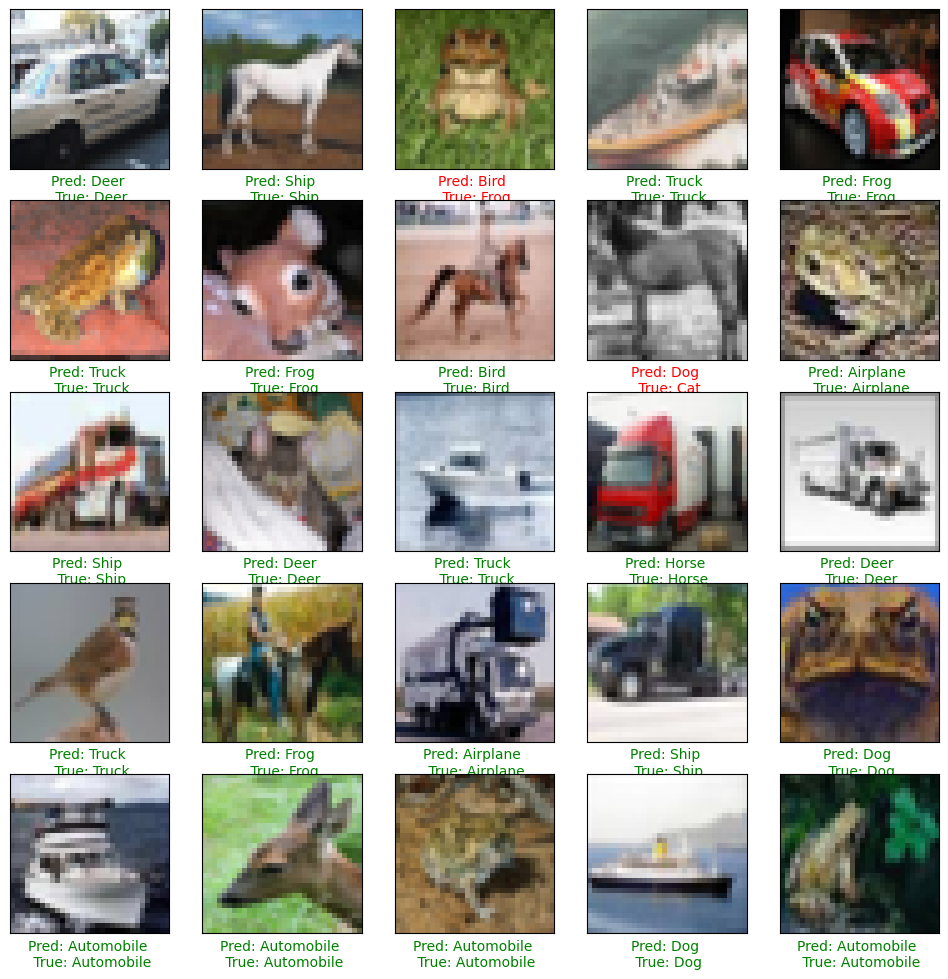

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained your model and obtained predictions and true labels
# Example lists for demonstration


# Extract images and labels from test_dataset
test_images = []
test_labels = []

for images, labels in test_dataset:
    test_images.append(images.numpy())  # Assuming you convert images to numpy arrays
    test_labels.append(labels.numpy())

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

# Normalize the images to [0, 1]
test_images = test_images.astype(np.float32) / 255.0

# Display images with predictions and true labels
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)  # Display the ith image
    predicted_label = class_names[y_pred[i]]
    true_label = class_names[y_true[i]]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Pred: {predicted_label} \n True: {true_label}', color=color)

plt.show()


Com o objetivo de entender como as camadas convolucionais e de pooling do modelo de CNN processam e extraem as características das imagens de entrada ao longo da rede neural usámos a visualização de feature maps. É útil para " o modelo, verificar se as características esperadas estão a ser aprendidas e entender como as informações são transformadas e representadas nas diferentes camadas da rede.

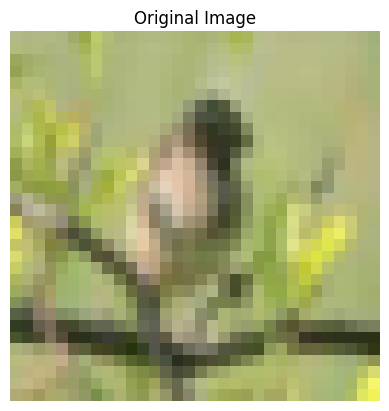

1/1 [==============================] - 0s 195ms/step


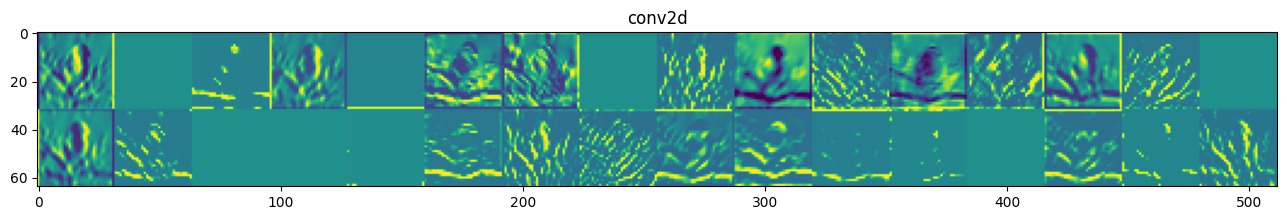

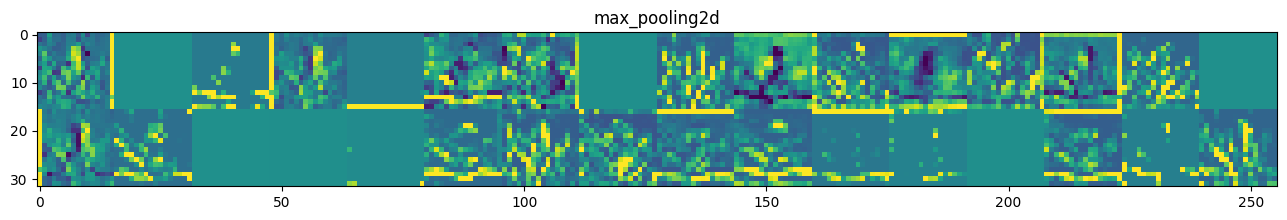

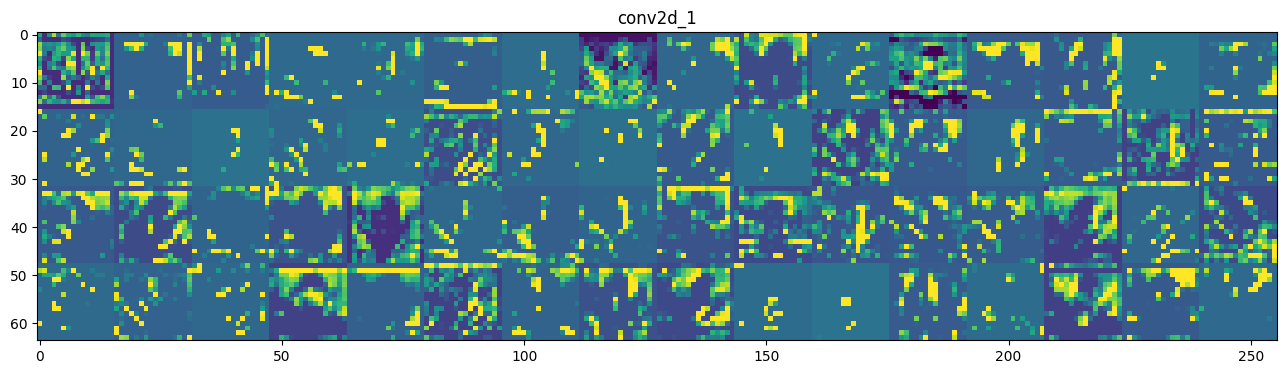

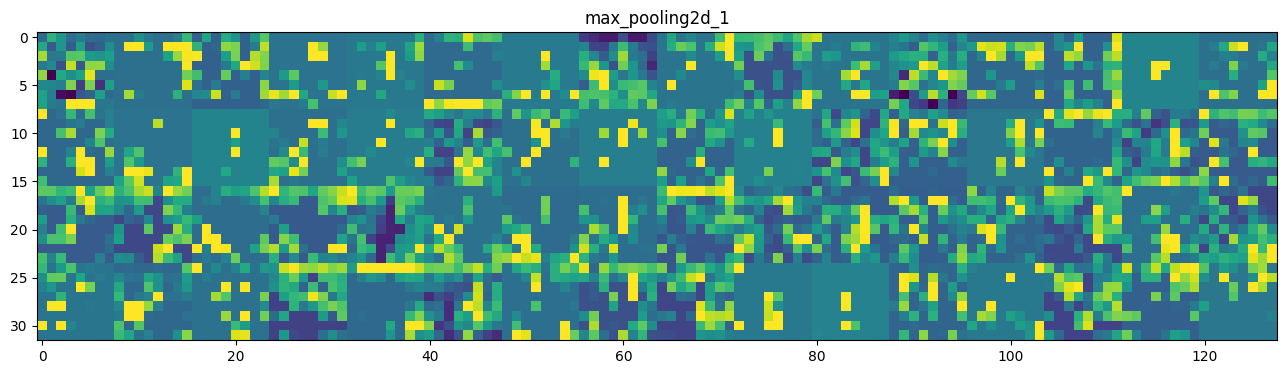

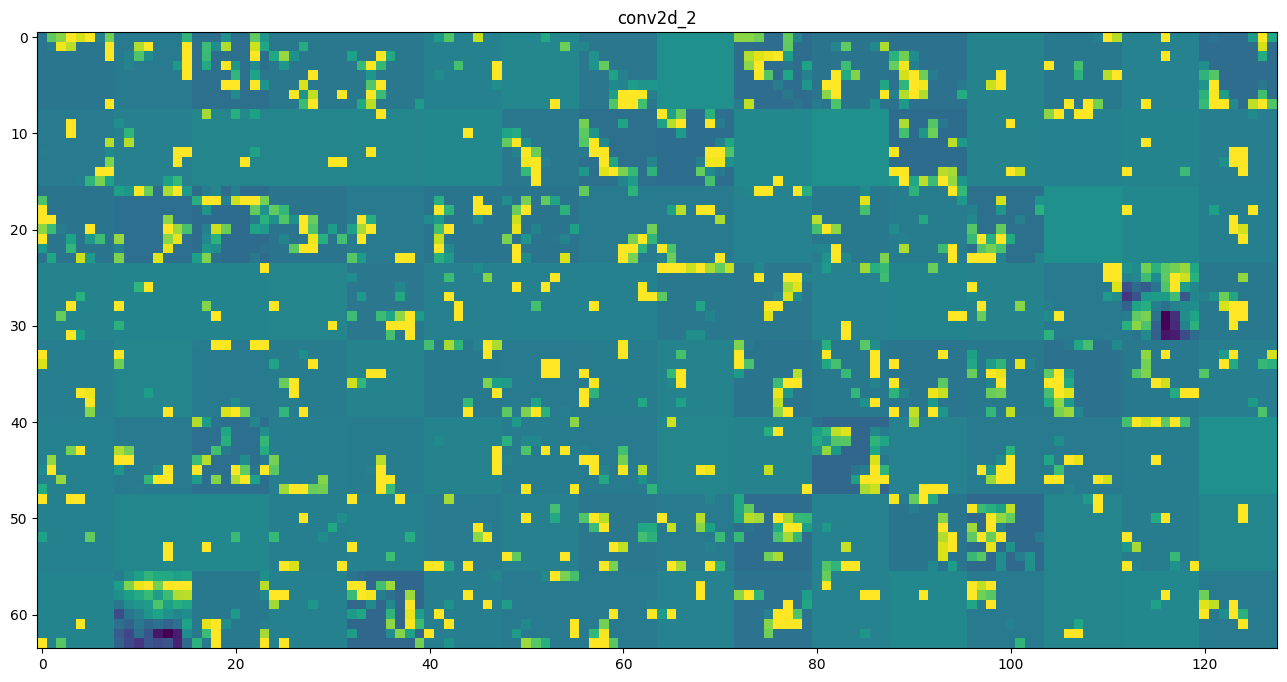

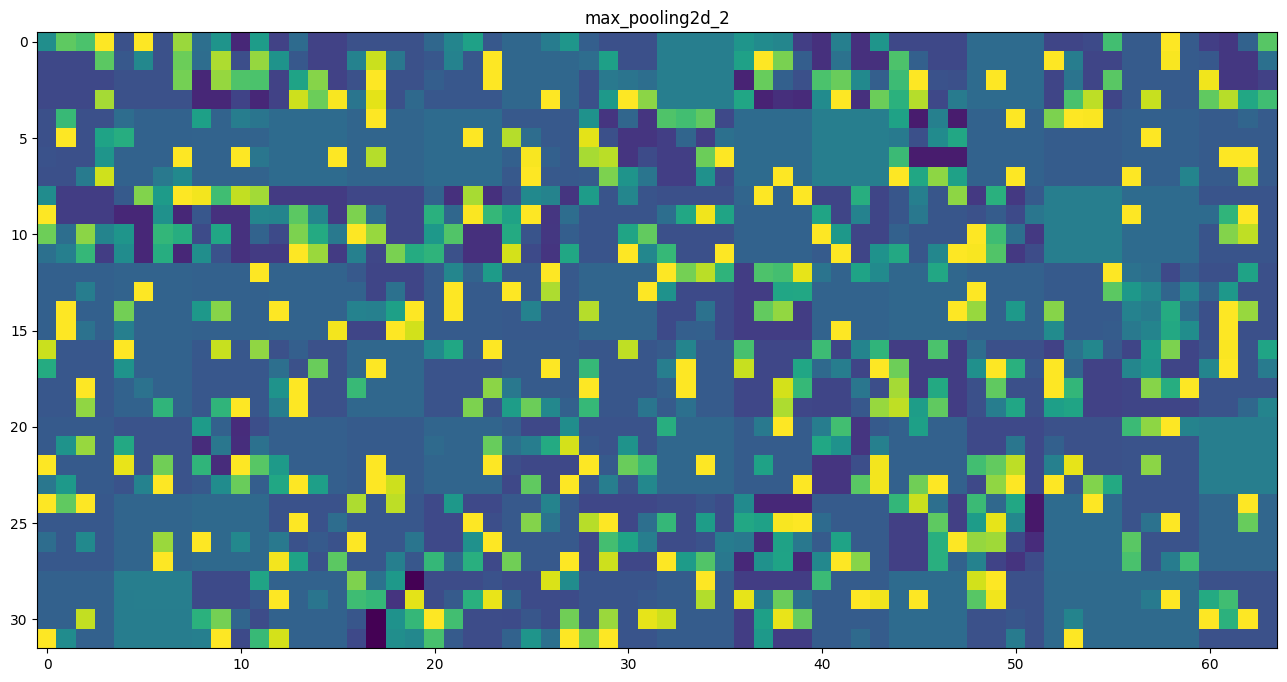

In [16]:
import matplotlib.pyplot as plt
from keras.models import Model
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import random

# Assuming you have defined your test_dataset and model somewhere

# Get the first image from test_dataset
first_batch = next(iter(test_dataset))  # Get the first batch from the dataset
first_image = first_batch[0][0]  # Extract the first image from the batch

# Display the original image
plt.imshow(first_image.numpy().astype("uint8"))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Preprocess the image for visualization
img = first_image.numpy()
img = np.expand_dims(img, axis=0)  # Now img has shape (1, 32, 32, 3)

def visualize_filters(model, img):
    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]

    activation_model = Model(inputs=model.input, outputs=layer_outputs)

    activations = activation_model.predict(img)

    layer_names = [layer.name for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]

    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]

        n_cols = n_features // 16  # Number of columns in the grid
        display_grid = np.zeros((size * n_cols, size * 16))

        for col in range(n_cols):
            for row in range(16):
                channel_image = layer_activation[0, :, :, col * 16 + row]
                channel_image -= channel_image.mean()
                channel_image /= (channel_image.std() + 1e-5)
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Visualize filters for the model and the first image
visualize_filters(model, img)


Para complementar usamos heat maps (mapas de calor) para visualizar as regiões de uma imagem que são mais importantes para a decisão de classificação feita pelo modelo. Este mapa mostra visualmente onde o modelo está a "focar" mais para fazer uma decisão sobre a classe da imagem. Isto é útil para interpretar e entender quais características da imagem que estão a ser consideradas mais relevantes pelo modelo durante o processo de classificação.

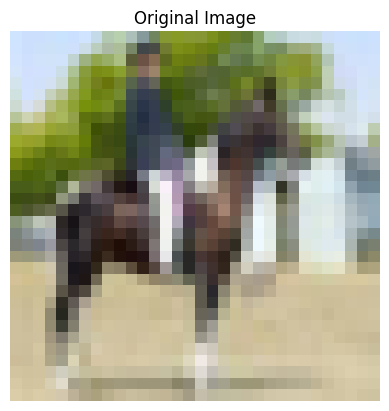

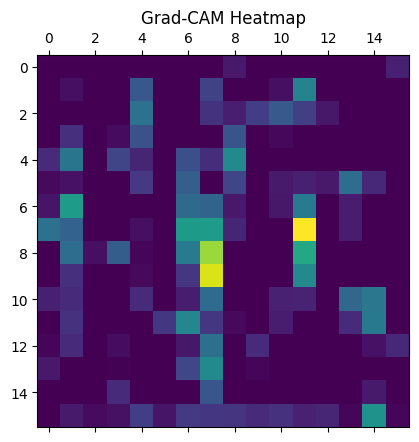

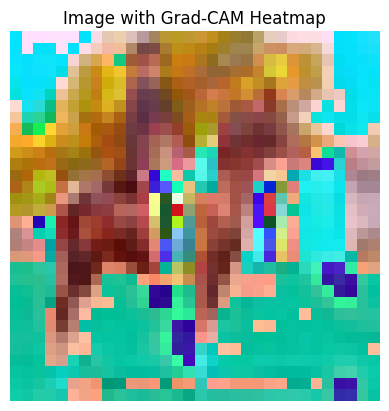

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

# Assuming test_dataset and model are already defined

random_index = random.randint(0, 500)

first_batch = next(iter(test_dataset))  # Get the first batch from the dataset
img = first_batch[0][0]  # Extract the first image from the batch

img_array = img.numpy()
img_array = np.expand_dims(img_array, axis=0)  # Now img_array has shape (1, 32, 32, 3)

plt.imshow(img_array[0].astype("uint8"))  # Display the original image
plt.title('Original Image')
plt.axis('off')
plt.show()

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

last_conv_layer_name = 'conv2d_1'  # Replace with your actual last conv layer name
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

plt.matshow(heatmap)
plt.title('Grad-CAM Heatmap')
plt.show()

def superimpose_heatmap(img, heatmap, alpha=0.4):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    return np.uint8(superimposed_img)

# Convert img_array to (32, 32, 3) for superimpose_heatmap function
img_for_superimpose = img_array[0].astype("uint8")

superimposed_img = superimpose_heatmap(img_for_superimpose, heatmap)

plt.imshow(superimposed_img)
plt.title('Image with Grad-CAM Heatmap')
plt.axis('off')
plt.show()


O Feature Space ajuda a verificar como as características são distribuídas no espaço, ao revelar padrões ou agrupamentos que podem indicar a capacidade do modelo de discriminar entre as diferentes classes.
Ao comparar os gráficos entre as camadas, podemos ver como estas (por exemplo, camadas convolucionais, em comparação com as camadas densas) aprendem e representam as características das imagens.

32/32 [==============================] - 0s 4ms/step


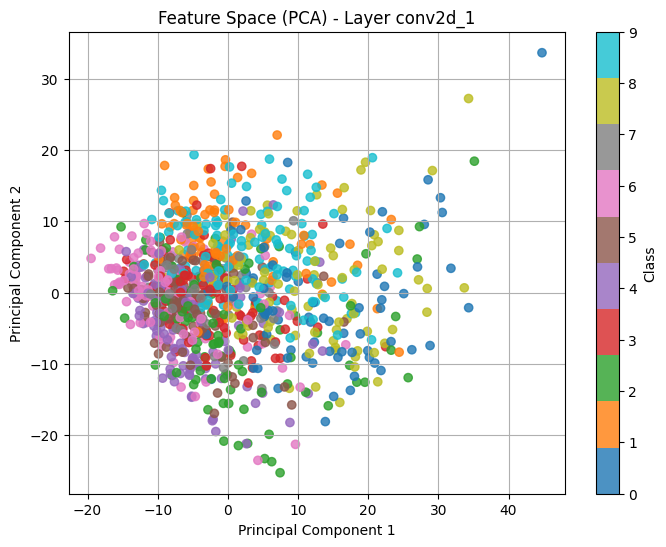

In [19]:
# Function to extract images and labels from a tf.data.Dataset
from sklearn.decomposition import PCA

def get_images_and_labels(dataset, num_samples):
    dataset = dataset.unbatch().take(num_samples)
    images = []
    labels = []
    for img, label in dataset:
        images.append(img.numpy())
        labels.append(label.numpy())
    return np.array(images), np.array(labels)

# Extract images and labels from the test dataset
x_test, y_test = get_images_and_labels(test_dataset, num_samples=1000)

# Visualization function
def visualize_feature_space(layer_name, x_data, y_data):
    feature_extractor = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

    num_samples = len(x_data)
    sample_indices = np.random.choice(len(x_data), num_samples, replace=False)
    sample_images = x_data[sample_indices]

    features = feature_extractor.predict(sample_images)

    pca = PCA(n_components=2)
    features_reduced = pca.fit_transform(features.reshape(num_samples, -1))

    plt.figure(figsize=(8, 6))
    plt.scatter(features_reduced[:, 0], features_reduced[:, 1], c=np.argmax(y_data[sample_indices], axis=1), cmap='tab10', marker='o', alpha=0.8)
    plt.colorbar(label='Class')
    plt.title(f'Feature Space (PCA) - Layer {layer_name}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

# Assuming you have x_test and y_test as your test dataset
layer_name = 'conv2d_1'
visualize_feature_space(layer_name, x_test, y_test)

Para mostrar a arquitetura do modelo

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0     